# <span style="color: yellow; font-weight: bold;">Deep learning em visão computacional</span> 

Aula elaborada por Prof. Dr. Raphael Garcia Moreira, visite:
* [LinkedIn](https://www.linkedin.com/in/raphaelgarciamoreira/)
* [Lattes](http://lattes.cnpq.br/1166256332419016)

## <span style="color: yellow; font-weight: bold;">Estrutura da Aula:</span> 

### Parte I
* ##### DeepLearning no contexto da Inteligência Artificial
* ##### Quebra de paradigma causada pelo Machine Learning
* ##### O Neurônio de McCulloch-Pitts

### Parte II
* ##### Como as imagens são tratadas no contexto da visão computacional
* ##### Convolução
* ##### Pooling
* ##### Funções de Ativação
* ##### Pré-processamento
* ##### Resultados do treinamento
* ##### Resultados das camadas de Convolução e Pooling

### Parte III
* ##### Discussão sobre próximas aulas
* ##### Perguntas

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)

2023-11-12 18:48:13.663284: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 18:48:13.664486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 18:48:13.687933: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 18:48:13.688428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 18:48:14.164858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

2.13.0


In [2]:
# O módulo os fornece uma interface para interagir com o sistema operacional subjacente
import os

# O método os.path.join() é uma função do módulo os em Python
# e é usada para construir caminhos de diretórios concatenando partes do caminho.
treinamento_cavalo_dir = os.path.join('./cavalo-ou-sapiens/cavalos/')
treinamento_sapiens_dir = os.path.join('./cavalo-ou-sapiens/sapiens/')

In [3]:
# Ordenados A-Z:
# treinamento_cavalo_nomes = sorted(os.listdir(treinamento_cavalo_dir)) # Ordenados A-Z:

# Ordenados OS:
treinamento_cavalo_nomes = os.listdir(treinamento_cavalo_dir)  # Ordenados OS:
print(treinamento_cavalo_nomes[:10])

['horse04-6.png', 'horse26-9.png', 'horse43-0.png', 'horse39-4.png', 'horse40-1.png', 'horse21-0.png', 'horse13-1.png', 'horse05-1.png', 'horse11-3.png', 'horse40-9.png']


In [4]:
# Ordenados A-Z:
# treinamento_sapiens_nomes = sorted(os.listdir(treinamento_sapiens_dir)) # Ordenados A-Z:

# Ordenados OS:
# Ordenados OS:
treinamento_sapiens_nomes = os.listdir(treinamento_sapiens_dir)
print(treinamento_sapiens_nomes[:10])

['human02-10.png', 'human15-29.png', 'human06-21.png', 'human05-20.png', 'human01-09.png', 'human04-04.png', 'human13-24.png', 'human04-15.png', 'human13-23.png', 'human08-22.png']


In [5]:
print('Total de imagens de treinamento para cavalos:',
      len(os.listdir(treinamento_cavalo_dir)))
print('Total de imagens de treinamento para sapiens:',
      len(os.listdir(treinamento_sapiens_dir)))

Total de imagens de treinamento para cavalos: 500
Total de imagens de treinamento para sapiens: 527


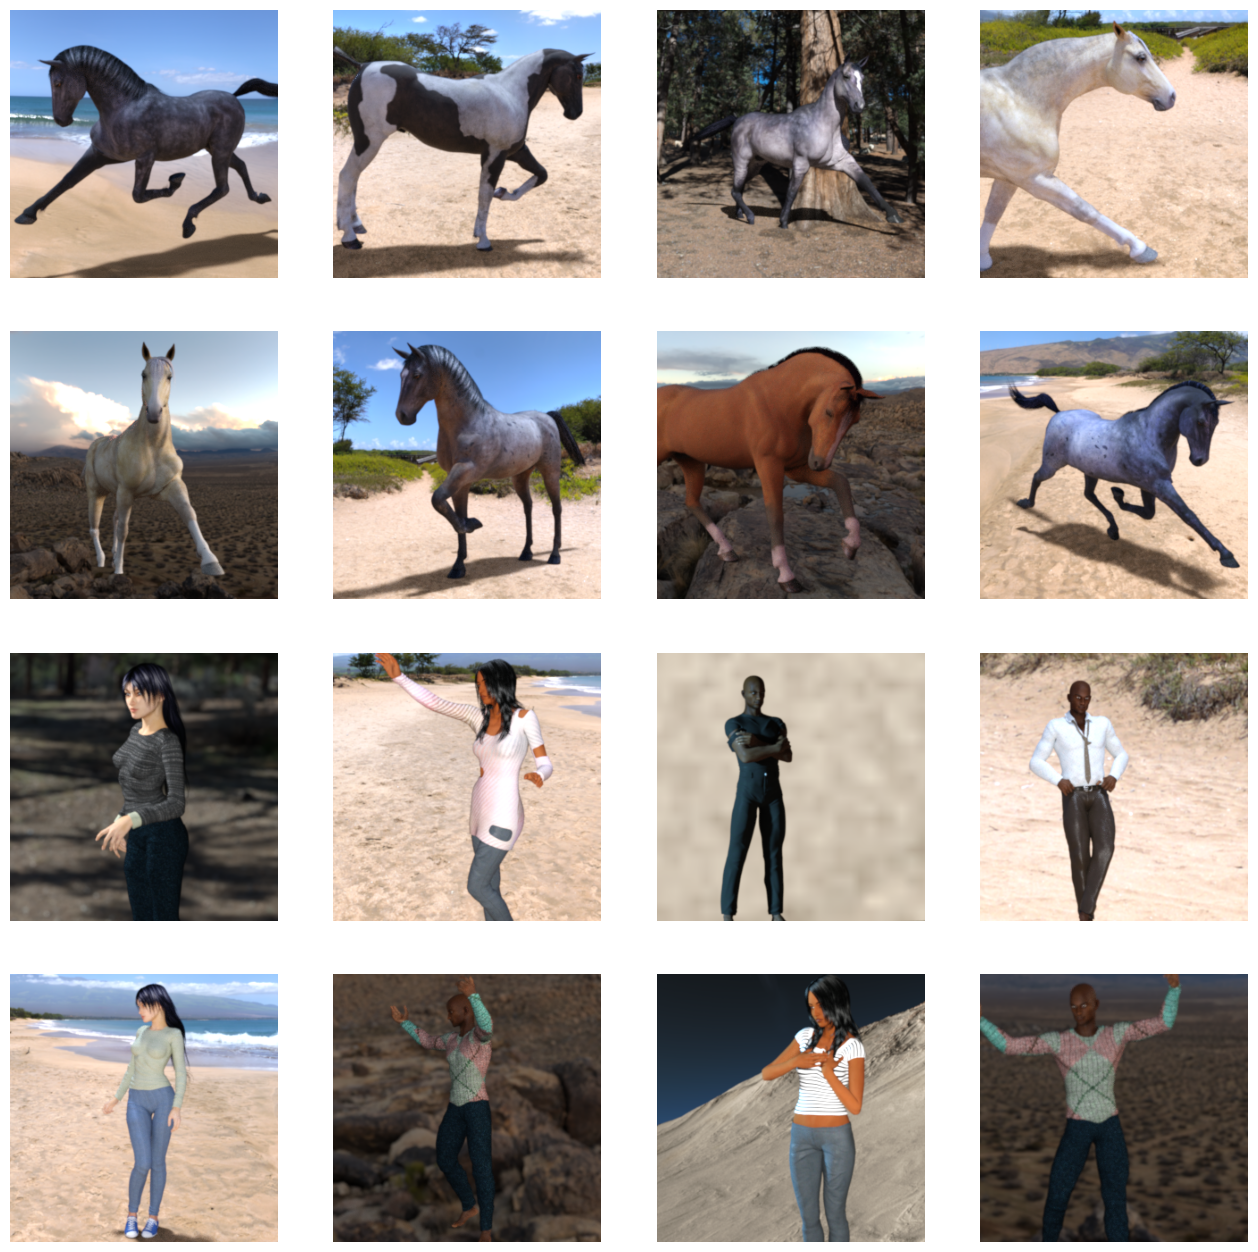

In [8]:
nlinhas = 4
ncolunas = 4
pic_index_INI = 8
size_img = 4
# Índice da figura
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncolunas * size_img, nlinhas * size_img)

# Inicializar a variável pic_index com valor final máximo: pic_index_INI
pic_index += pic_index_INI

# variável temporária IMGnome, usada como variável de iteração para compor as variáveis 'proximo_cavalo_pix' e 'proximo_sapiens_pix'
proximo_cavalo_pix = [os.path.join(treinamento_cavalo_dir, IMGnome)
                      for IMGnome in treinamento_cavalo_nomes[pic_index-pic_index_INI:pic_index]]
proximo_sapiens_pix = [os.path.join(treinamento_sapiens_dir, IMGnome)
                       for IMGnome in treinamento_sapiens_nomes[pic_index-pic_index_INI:pic_index]]

for i, img_path in enumerate(proximo_cavalo_pix+proximo_sapiens_pix):
    sp = plt.subplot(nlinhas, ncolunas, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Imagem

Em visão computacional, entendemos a imagem como uma matriz de valores numéricos.

<p align="center">
  <img src="imagematrix_exemplo_Stanford.png" alt="Matriz numérica de uma imagem" width="720">
</p>

<center> 

[fonte: Stanford](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html) 
</center>

## Convolução

A convolução em uma imagem envolve a aplicação de filtros sobre a imagem original. Esses filtros deslizam pela imagem e realizam operações locais, multiplicando os valores dos pixels pelos pesos do filtro e somando-os para produzir um novo valor na imagem de saída

<p align="center">
  <img src="convolution-1_NVIDIA_exemplo.png" alt="Exemplo de convolução" width="720">
</p>

<center> 

[fonte: NVIDIA Developer](https://developer.nvidia.com/discover/convolution) 
</center>
  
## Pooling

Pooling, refere-se a operações que reduzem a dimensionalidade dos dados mantendo as características mais importantes.

<p align="center">
  <img src="Pooling_exemplos.png" alt="Exemplos de Pooling" width="720">
</p>

<center> 

[fonte: Towards AI](https://towardsai.net/p/l/introduction-to-pooling-layers-in-cnn) 
</center>

<p align="center">
  <img src="Pooling_exemplos.png" alt="Exemplos de Pooling" width="720">
</p>

<center> 

[fonte: Towards AI](https://towardsai.net/p/l/introduction-to-pooling-layers-in-cnn) 
</center>

## Funções de ativação

* ReLU (Rectified Linear Unit)

`f(x) = max(0, x)`

A função ReLU é amplamente usada em camadas convolucionais de CNNs. Sua natureza de supressão de valores negativos ajuda na aprendizagem de características importantes nas imagens.

* Sigmoid

`f(x) = 1 / (1 + e^(-x))`

 A função sigmoid é frequentemente usada na camada de saída de redes neurais para problemas de classificação binária. Ela mapeia os valores para o intervalo (0, 1), o que pode ser interpretado como a probabilidade de pertencer a uma determinada classe.

In [9]:
model = tf.keras.models.Sequential([
    # Observar que as imagens possuem 300 x 300 pixels e são coloridas, logo 3 bytes de cores RGB
    # Primeira Convolução
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda Convolução
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Terceira Convolução
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Quarta Convolução
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Quinta Convolução
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Achatamento dos resultados para entrar na camada intermediária DNN
    tf.keras.layers.Flatten(),
    # Camada intermediária de neurônios
    tf.keras.layers.Dense(512, activation='relu'),
    # Somente um neurônio de saída. Ele conterá um valor de 0 a 1, onde 0 para 'cavalos' e 1 para 'sapiens'
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Relatório da arquitetura da rede neural
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

2023-11-12 18:49:53.285806: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-12 18:49:53.356853: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


#### <span style="color: yellow;">loss</span> 
A função de perda é um critério que o modelo tenta minimizar durante o treinamento. No caso do código fornecido, a função de perda é 'binary_crossentropy'. Essa função é comumente usada em problemas de classificação binária.

#### <span style="color: yellow;">optimizer:</span>
O otimizador é o algoritmo utilizado para ajustar os pesos da rede neural durante o treinamento, com o objetivo de minimizar a função de perda. No código, é utilizado o otimizador RMSprop com uma taxa de aprendizado de 0.001 (RMSprop(learning_rate=0.001)). RMSprop é um otimizador popular que adapta dinamicamente a taxa de aprendizado ao longo do tempo para melhorar o treinamento.

#### <span style="color: yellow;">metrics:</span>
As métricas são usadas para avaliar o desempenho do modelo durante e após o treinamento. No código, a métrica escolhida é 'accuracy', que mede a precisão do modelo na tarefa de classificação binária. A precisão é a proporção de instâncias corretamente classificadas em relação ao total.

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### <span style="color: yellow;">Pré-processamento de dados</span> 

In [11]:
# Todas os valores numéricos das imagens serão redimensionadas em 1/255 (valor das cores)
treina_dadosGerados = ImageDataGenerator(rescale=1/255)

# Imagens de treinamento em lotes de 128 usando o gerador treina_dadosGerados
treina_gerador = treina_dadosGerados.flow_from_directory(
    './cavalo-ou-sapiens/',     # Pasta com as duas classes
    # Qualquer imagem será redimencionada para 300 x 300
    target_size=(300, 300),
    batch_size=128,
    # Como usamos loss='binary_crossentropy' perda de entropia binária, precisamos de rótulos binários
    class_mode='binary')

Found 1027 images belonging to 2 classes.


#### <span style="color: yellow;">steps_per_epoch:</span> 
steps_per_epoch=8 significa que, em cada época, o modelo será treinado em 8 lotes de amostras.

#### <span style="color: yellow;">epochs:</span> 
Este parâmetro define o número total de épocas de treinamento. Cada época representa uma passagem completa por todo o conjunto de treinamento. No exemplo, epochs=15 indica que o modelo será treinado por 15 épocas.

#### <span style="color: yellow;">verbose:</span> 
verbose=0: Treinamento ocorre em silêncio, sem informações de progresso.
verbose=1: Exibe uma barra de progresso animada durante o treinamento, mostrando o número da época e métricas de treinamento.
verbose=2: Similar ao verbose=1, mas sem a barra de progresso animada.

In [12]:
historicoProgesso = model.fit(
    treina_gerador,
    steps_per_epoch=8,
    epochs=15,
    verbose=1)

Epoch 1/15
8/8 [==============================] - 6s 769ms/step - loss: 0.7522 - accuracy: 0.5128
Epoch 2/15
8/8 [==============================] - 5s 610ms/step - loss: 0.7063 - accuracy: 0.5050
Epoch 3/15
8/8 [==============================] - 5s 763ms/step - loss: 0.6379 - accuracy: 0.7408
Epoch 4/15
8/8 [==============================] - 6s 706ms/step - loss: 0.8618 - accuracy: 0.6494
Epoch 5/15
8/8 [==============================] - 6s 707ms/step - loss: 0.5152 - accuracy: 0.8125
Epoch 6/15
8/8 [==============================] - 6s 717ms/step - loss: 0.4360 - accuracy: 0.8398
Epoch 7/15
8/8 [==============================] - 6s 628ms/step - loss: 0.4979 - accuracy: 0.8242
Epoch 8/15
8/8 [==============================] - 6s 615ms/step - loss: 0.1723 - accuracy: 0.9499
Epoch 9/15
8/8 [==============================] - 5s 613ms/step - loss: 0.2176 - accuracy: 0.9177
Epoch 10/15
8/8 [==============================] - 6s 622ms/step - loss: 0.1237 - accuracy: 0.9522
Epoch 11/15
8/8 [==

In [13]:
imagens_teste = os.listdir("./testes/")
print(imagens_teste)

for i in imagens_teste:
    print(i)
    path = './testes/' + i
    img = load_img(path, target_size=(300, 300))
    X = img_to_array(img)
    X /= 255
    X = np.expand_dims(X, axis=0)

    imagens_teste = np.vstack([X])
    classes = model.predict(imagens_teste, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(i + " é um sapiens")
    else:
        print(i + " é um cavalo")

['horse07-8.png', 'mulher_estrada_00.jpg', 'human04-14.png', 'Raphael_rosto.jpg', 'mulher_preocupada_00.jpg', 'menina_00.jpg', 'menino_00.jpg', 'homem_agua_00.jpg', 'Pessoa_caindo.jpg', 'cavalo_campo_00.jpg']
horse07-8.png
1/1 [==============================] - 0s 90ms/step
[0.0085083]
horse07-8.png é um cavalo
mulher_estrada_00.jpg
1/1 [==============================] - 0s 12ms/step
[0.9999761]
mulher_estrada_00.jpg é um sapiens
human04-14.png
1/1 [==============================] - 0s 46ms/step
[0.97972375]
human04-14.png é um sapiens
Raphael_rosto.jpg
1/1 [==============================] - 0s 22ms/step
[0.96334803]
Raphael_rosto.jpg é um sapiens
mulher_preocupada_00.jpg
1/1 [==============================] - 0s 13ms/step
[0.9978293]
mulher_preocupada_00.jpg é um sapiens
menina_00.jpg
1/1 [==============================] - 0s 12ms/step
[0.99701524]
menina_00.jpg é um sapiens
menino_00.jpg
1/1 [==============================] - 0s 43ms/step
[1.]
menino_00.jpg é um sapiens
homem_agua_00

## <span style="color: yellow;">Conhecendo as camadas de Convolução e Pooling</span>

./testes/Raphael_rosto.jpg
1/1 [==============================] - 0s 50ms/step


/tmp/ipykernel_27819/1688867747.py:27: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipykernel_27819/1688867747.py:30: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


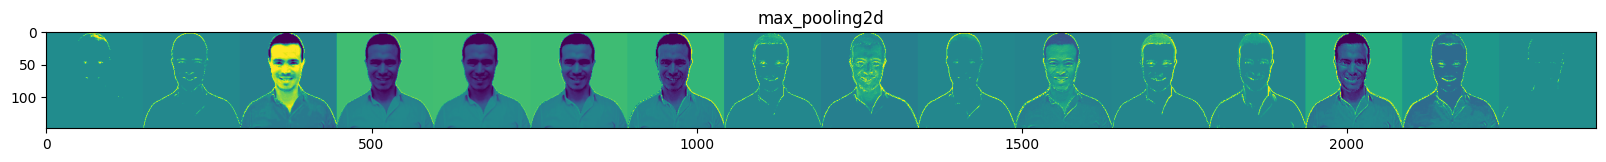

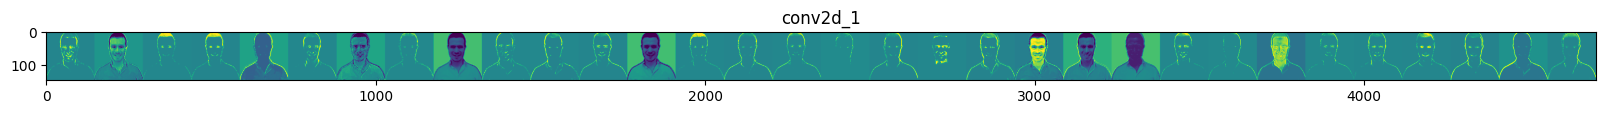

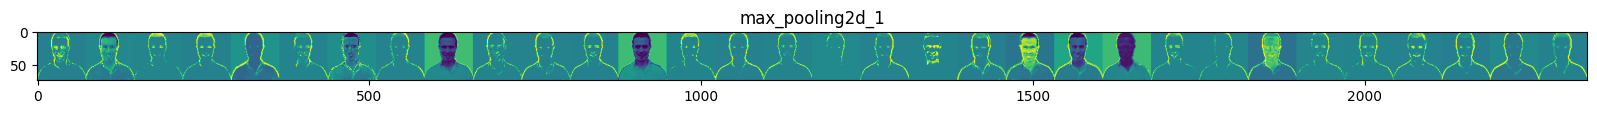

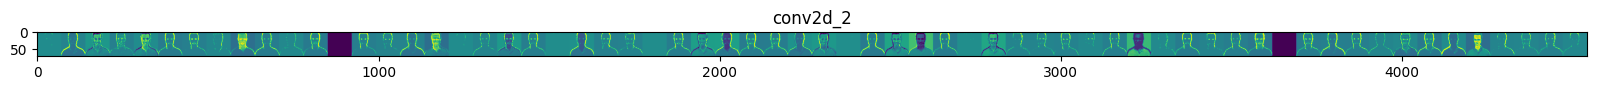

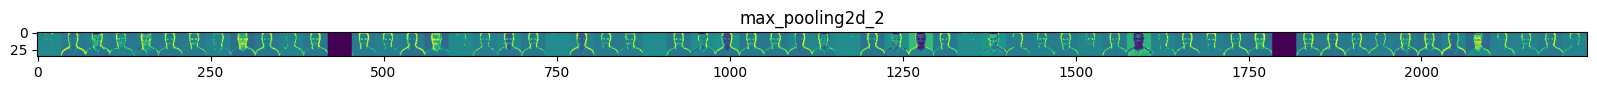

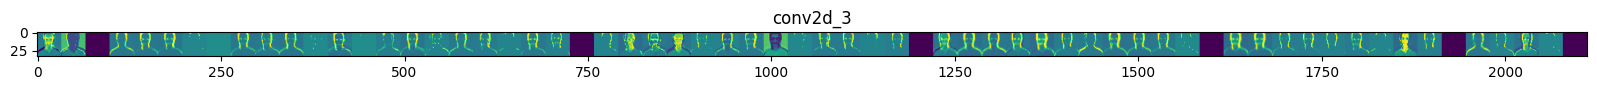

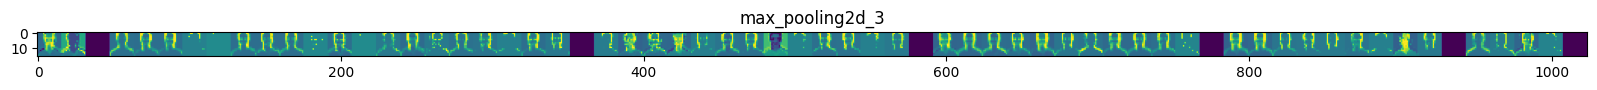

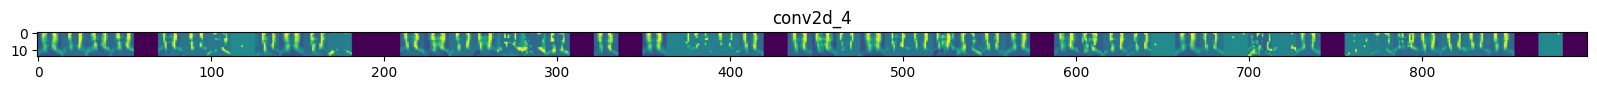

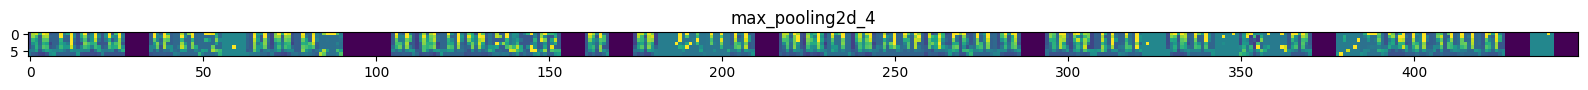

In [14]:
imagens_teste = os.listdir("./testes/")

saidas_seq = [layer.output for layer in model.layers[1:]]
visualizacao_model = tf.keras.models.Model(
    inputs=model.input, outputs=saidas_seq)

Indice_IMG_Teste = 3  # Indicar aqui a posição da imagem a ser avaliada

path = './testes/' + imagens_teste[Indice_IMG_Teste]
print(path)
img = load_img(path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255

mapas_sequenciais = visualizacao_model.predict(x)
layer_nomes = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_nomes, mapas_sequenciais):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size: (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')